In [ ]:
import pandas as pd
arquivo = "Data/dados_amr.xlsx"
df = pd.read_excel(arquivo)
df.dtypes

id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object

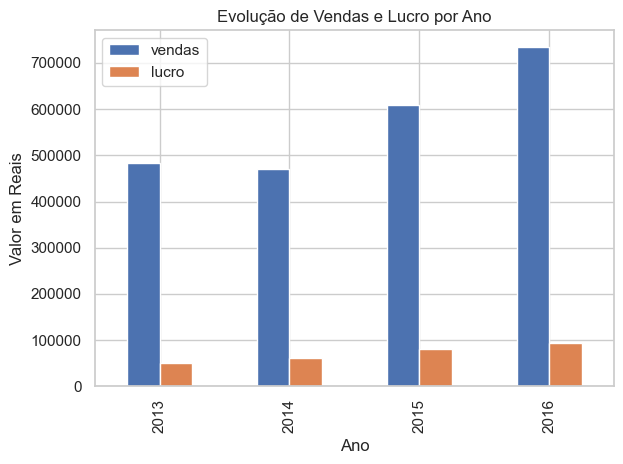

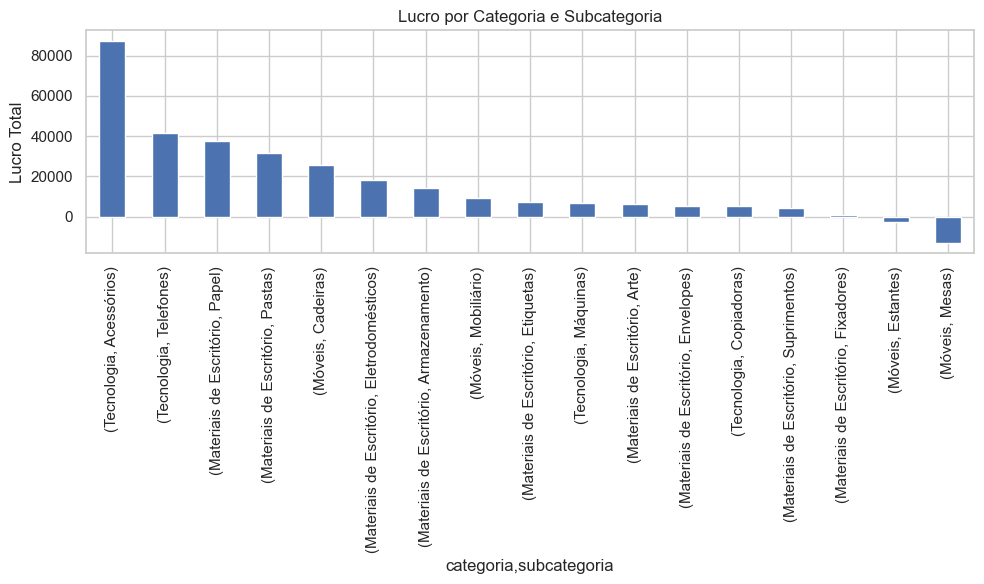

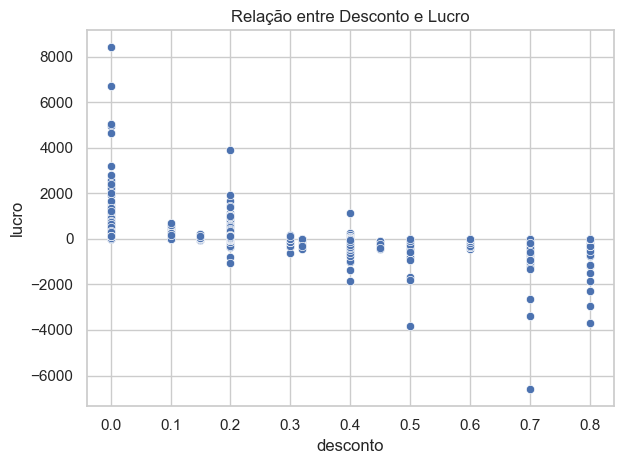

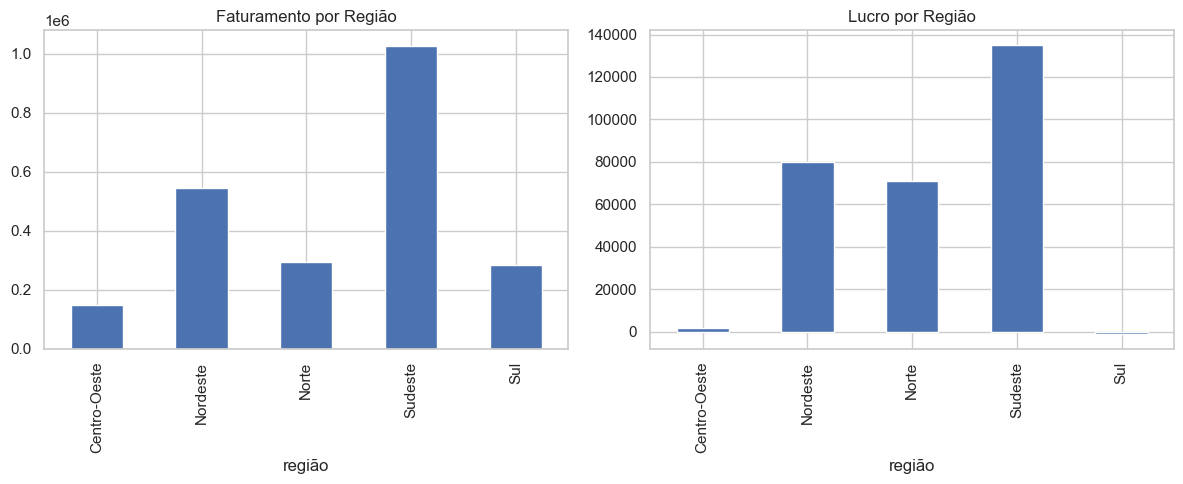

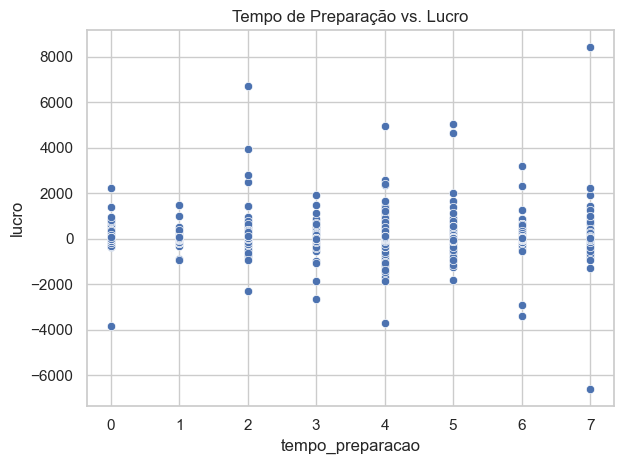

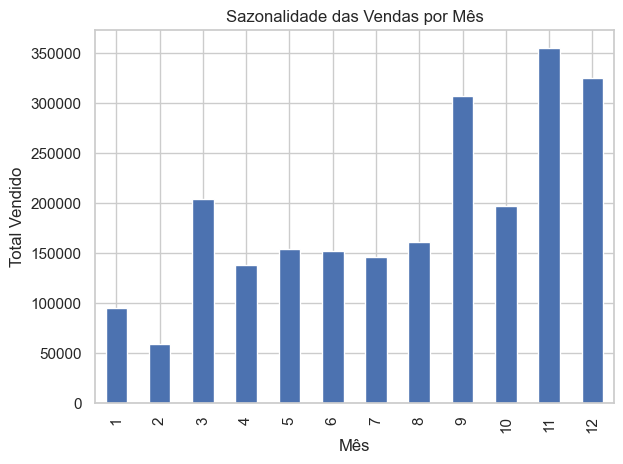

In [10]:
# Instale os pacotes caso necessário:
# pip install pandas matplotlib seaborn numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
arquivo = "dados_amr.xlsx"
df = pd.read_excel(arquivo, sheet_name="Base_Limpa")

# Conversão de datas
df['data_pedido'] = pd.to_datetime(df['data_pedido'], errors='coerce')


# Configurações visuais
sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# 1. Evolução de Vendas e Lucro por Ano
df['ano_pedido'] = df['data_pedido'].dt.year
df.groupby('ano_pedido')[['vendas', 'lucro']].sum().plot(kind='bar')
plt.title('Evolução de Vendas e Lucro por Ano')
plt.ylabel('Valor em Reais')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

# 2. Lucro por Categoria e Subcategoria
df.groupby(['categoria', 'subcategoria'])['lucro'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Lucro por Categoria e Subcategoria')
plt.ylabel('Lucro Total')
plt.tight_layout()
plt.show()

# 3. Relação entre Desconto e Lucro
sns.scatterplot(data=df, x='desconto', y='lucro')
plt.title('Relação entre Desconto e Lucro')
plt.tight_layout()
plt.show()

# 4. Faturamento e Lucro por Região
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df.groupby('região')['vendas'].sum().plot(kind='bar', ax=ax[0], title='Faturamento por Região')
df.groupby('região')['lucro'].sum().plot(kind='bar', ax=ax[1], title='Lucro por Região')
plt.tight_layout()
plt.show()

# 5. Tempo de Preparação vs. Lucro
sns.scatterplot(data=df, x='tempo_preparacao', y='lucro')
plt.title('Tempo de Preparação vs. Lucro')
plt.tight_layout()
plt.show()

# 6. Sazonalidade das Vendas por Mês
df['mes_pedido'] = df['data_pedido'].dt.month
df.groupby('mes_pedido')['vendas'].sum().plot(kind='bar')
plt.title('Sazonalidade das Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Vendido')
plt.tight_layout()
plt.show()
